# Fluffy Unicorns

# Step 1. Big Picture & Setup (See the slides)

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [ ]:
import sklearn # general ml package
import numpy as np # fundamental package for scientific computing
import os # to run file I/O operation 

np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, "data")
os.makedirs(DATA_PATH, exist_ok=True)


# Step 2. Get the data

**Code used to add longitude and latitude of crime data. It takes too long to run everytime so was run seperatley**

In [ ]:
!wget https://github.com/djzh01/uva-crime-map/raw/main/Crime_Updated.zip

--2021-12-10 03:32:39--  https://github.com/djzh01/uva-crime-map/raw/main/Crime_Updated.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/djzh01/uva-crime-map/main/Crime_Updated.zip [following]
--2021-12-10 03:32:39--  https://raw.githubusercontent.com/djzh01/uva-crime-map/main/Crime_Updated.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 708883 (692K) [application/zip]
Saving to: ‘Crime_Updated.zip.1’

Crime_Updated.zip.1 100%[===================>] 692.27K  --.-KB/s    in 0.04s   

2021-12-10 03:32:39 (15.8 MB/s) - ‘Crime_Updated.zip.1’ saved [708883/708883]



In [ ]:
!unzip Crime_Updated.zip -d ./data

Archive:  Crime_Updated.zip
replace ./data/Crime_Updated.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd # Pandas module to enable data manipulation
crime = pd.read_csv(f"{PROJECT_ROOT_DIR}/data/Crime_Updated.csv")
crime.head()

,Unnamed: 0,RecordID,Offense,IncidentID,BlockNumber,StreetName,Agency,DateReported,HourReported,ReportingOfficer,longitude,latitude
0,0,1.0,Assist Citizen - Mental/TDO/ECO,2.021000e+11,1000.0,W MAIN ST,CPD,2021/11/07 05:55:37+00,155.0,"Vlasis, Christopher",-78.495070,38.032527
1,1,2.0,Assist Agency - Backup/Assist,2.021000e+11,500.0,16TH ST NW,CPD,2021/11/07 04:44:30+00,44.0,"Whitten, Tobyn",-78.498628,38.040041
2,2,3.0,Lost/FoundProperty,2.021000e+11,100.0,MADISON LN,CPD,2021/11/06 20:30:00+00,1630.0,"Eckenroth, Rachel",-78.502246,38.036476
3,3,4.0,Robbery - Strong Arm,2.021000e+11,1200.0,CARLTON AVE,CPD,2021/11/06 16:10:42+00,1210.0,"Houchens, Jamell",-78.471688,38.023378
4,4,5.0,Death Investigation - DOA,2.021000e+11,700.0,6TH ST SE,CPD,2021/11/06 07:05:20+00,305.0,"Blackwell, Ryan",-78.480673,38.024994


In [ ]:
#Don't Uncomment

#Longitude Latitude
# import requests
# import pprint

# crime['longitude'] = np.nan
# crime['latitude'] = np.nan

# def loc(x): 
#   if (x.StreetName != np.nan and x.BlockNumber != np.nan):
#     if ',' in x.StreetName:
#       x.StreetName = x.StreetName[0:x.StreetName.index(',')]
#     try:
#       address = str(int(x.BlockNumber)) + '%20' + str(x.StreetName).replace(" ", "%20")
#       url = ('https://nominatim.openstreetmap.org/search?street=' + address + '&city=Charlottesville&format=json&limit=1')
#       response = requests.get(url)
#       if response.status_code == 200:
#         payload = response.json()
#         if payload != []:
#           x.longitude = payload[0]['lon']
#           x.latitude = payload[0]['lat']
#         else:
#           x.longitude = np.nan
#           x.latitude = np.nan
#         return x
#     except ValueError as ve:
#       None

# crime_updated = crime.apply(loc, axis=1)
# crimes.to_csv(r'Crime_Updated.csv')

In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25375 entries, 0 to 25374
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        25375 non-null  int64  
 1   RecordID          24296 non-null  float64
 2   Offense           24296 non-null  object 
 3   IncidentID        24296 non-null  float64
 4   BlockNumber       24296 non-null  float64
 5   StreetName        24296 non-null  object 
 6   Agency            24296 non-null  object 
 7   DateReported      24296 non-null  object 
 8   HourReported      24296 non-null  float64
 9   ReportingOfficer  24252 non-null  object 
 10  longitude         23789 non-null  float64
 11  latitude          23789 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 2.3+ MB


In [ ]:
# View the counts of each value in the "ocean_proximity" feature
crime["ReportingOfficer"].value_counts()

Newton, Arla            517
Stein, Nathan           512
Wagner, Christopher     506
Johnston, Ernest        499
Shiflett, Tammy         488
                       ... 
McKean, Thomas            1
Upman, Stephen            1
Thomas, Alfred            1
Coleman, Ursula           1
Oneill, Maeve             1
Name: ReportingOfficer, Length: 195, dtype: int64

In [ ]:
print(crime["Offense"].value_counts().sort_index(ascending=True))

Accident - w/out Injuries          97
Accident Private Property          19
Accident Property Damage           24
Accident w/Injuries                58
Alarm - True                        1
                                 ... 
Trespass                          189
Unauthorized Use of Motor Veh      71
Vandalism                        1587
Warrant Service                   124
Weapons Violations                112
Name: Offense, Length: 119, dtype: int64


In [ ]:
offense_groups = {
 'Accident - w/out Injuries' : 'Traffic',
 'Accident Private Property' : 'Traffic',
 'Accident Property Damage' : 'Traffic',
 'Accident w/Injuries' : 'Traffic',
 'Alarm - True' : None,
 'Alarm - Unknown' : None,
 'Alarm-Accidental' : None,
 'Animal - Bite' : None,
 'Animal Complaint' : None,
 'Arson' : None,
 'Assault Aggravated': 'Assault',
 'Assault Intimidation': 'Assault',
 'Assault Simple': 'Assault',
 'Assist Agency - Arrest/warrant' : None,
 'Assist Agency - Backup/Assist' : None,
 'Assist Agency - Other' : None,
 'Assist Citizen - Medical' : None,
 'Assist Citizen - Mental/TDO/ECO' : None,
 'Assist Citizen - Misc' : None,
 'Assist Citizen - Welfare Check' : None,
 'Assisted on Prev Reported' : None,
 'Attemped Suicide' : 'Mental Health',
 'Bad Check' : 'Fraud',
 'Bomb Threat' : None,
 'Burglary' : 'Theft',
 'COVID-19 Tracking' : None,
 'Child Ab - Contr to Delinquency' : None,
 'Comm Relations Initiative - CRI' : None,
 'Computer Crime' : None,
 'Crime Prevent Initiative - CPI' : None,
 'Crisis Assessment' : None,
 'Curfew/Loitering/Vagrancy' : None,
 'Death Investigation - DOA' : 'Death',
 'Disorderly Conduct' : 'Disturbance',
 'Disturbance - Non Domestic' : 'Disturbance',
 'Domestic Disturbance' : 'Disturbance',
 'Driving Under the Influence' : 'Drug',
 'Drug Equipment Violation' : 'Drug',
 'Drug Investigation' : 'Drug',
 'Drug/Narcotics Violation' : 'Drug',
 'Drunkeness DIP' : 'Drug',
 'Embezzelment' : 'Monetary',
 'Extortion/Blackmail' : 'Monetary',
 'False Report of Crime' : None,
 'Family Offense - Non-Violent' : 'Disturbance',
 'Field Interview' : None,
 'Fires Not Arson' : None,
 'Fireworks Violation' : None,
 'Forgery/Counterfeiting' : 'Fraud',
 'Found/Recovered Property' : None,
 'Fraud-credit card' : 'Fraud',
 'Fraud-false pretense' : 'Fraud',
 'Fraud-impersonation' : 'Fraud',
 'Fraud-welfare' : 'Fraud',
 'Fraud-wire fraud' : 'Fraud',
 'Harassment' : 'Disturbance',
 'Hit and Run' : 'Traffic',
 'Homicide-murder/non-negligent' : 'Death',
 'Homicide-negligent manslaughter' : 'Death',
 'Identity Theft' : 'Fraud',
 'Impersonating a Police Officer' : 'Fraud',
 'Juvenile Investigation' : None,
 'Kidnap/Abduction' : 'Missing Person',
 'Larceny - All Other' : 'Larceny',
 'Larceny - From Coin Oper Device' : 'Larceny',
 'Larceny - From Motor Vehicle': 'Larceny',
 'Larceny - Of Veh Parts/Access' : 'Larceny',
 'Larceny - Pocket Picking' : 'Larceny',
 'Larceny - Purse Snatching' : 'Larceny',
 'Larceny - Shoplifitng' : 'Larceny',
 'Larceny - Theft from Building' : 'Larceny',
 'Liquor Law Violation' : 'Drug',
 'Littering/Illegal Dumping' : None,
 'Lost/FoundProperty' : None,
 'Misc - Criminal Call' : None,
 'Misc - Non-Criminal Call' : None,
 'Missing Person-adult' : 'Missing Person',
 'Missing Person-juvenile' : 'Missing Person',
 'Motor Vehicle Theft' : 'Theft',
 'Narcotics' : 'Drug',
 'Noise Complaint' : None,
 'Open Door/Window' : None,
 'Phone Calls - Annoying' : None,
 'Phone Calls - Threat or Obscene' : None,
 'Pornography' : 'Sex Offense',
 'Problem Solving Project - PSP' : None,
 'Prostitution-assisting/promoting' : 'Sex Offense',
 'Prowler - Peeping  Tom' : 'Sex Offense',
 'Robbery - Armed' : 'Theft',
 'Robbery - Strong Arm' : 'Theft',
 'Robbery/Conversion' : 'Theft',
 'Runaway' : 'Missing Person',
 'Sex Offense' : 'Sex Offense',
 'Sex Offense - Assault w/Object' : 'Sex Offense',
 'Sex Offense - Forcible Rape' : 'Sex Offense',
 'Sex Offense - Forcible Sodomy' : 'Sex Offense',
 'Sex Offense-forcible fondling' : 'Sex Offense',
 'Sex Offense-statutory rape' : 'Sex Offense',
 'Shots Fired/Illegal Hunting' : 'Gun',
 'Solicitation illegal w/o permit' : None,
 'Stalking' : 'Potential Threat',
 'Stolen Property Offenses' : 'Theft',
 'Stop w/Search/Frisk' : None,
 'Stop w/o Search/Frisk' : None,
 'Suicide Investigation' : 'Mental Health',
 'Suspicious Activity' : 'Potential Threat',
 'Suspicious Person' : 'Potential Threat',
 'Suspicious Vehicle' : 'Potential Threat',
 'Tactical Crime Initiative - TCI' : None,
 'Towed Vehicle' : 'Traffic',
 'Traffic - Abandoned Vehicle' : 'Traffic',
 'Traffic - Disabled Vehicle' : 'Traffic',
 'Traffic - Traffic Hazard' : 'Traffic',
 'Traffic Stops' : 'Traffic',
 'Trespass' : 'Trespass',
 'Unauthorized Use of Motor Veh': 'Traffic',
 'Vandalism' : 'Vandalism',
 'Warrant Service' : None,
 'Weapons Violations' : 'Gun'
}

In [ ]:
crime['Grouped_Offense'] = crime['Offense'].copy()
for i in range(len(crime)):
  if crime['Grouped_Offense'][i] is not np.nan:
    crime['Grouped_Offense'][i] = offense_groups[crime['Offense'][i]]
crime = crime.drop("Offense", axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
print(crime["Grouped_Offense"].value_counts().sort_index(ascending=True))

Assault             2954
Death                274
Disturbance          864
Drug                1221
Fraud               1054
Gun                  347
Larceny             4300
Mental Health         24
Missing Person       484
Monetary              80
Potential Threat    1598
Sex Offense          316
Theft               1092
Traffic             3023
Trespass             189
Vandalism           1587
Name: Grouped_Offense, dtype: int64


In [ ]:
crime.head()

,Unnamed: 0,RecordID,IncidentID,BlockNumber,StreetName,Agency,DateReported,HourReported,ReportingOfficer,longitude,latitude,Grouped_Offense
0,0,1.0,2.021000e+11,1000.0,W MAIN ST,CPD,2021/11/07 05:55:37+00,155.0,"Vlasis, Christopher",-78.495070,38.032527,None
1,1,2.0,2.021000e+11,500.0,16TH ST NW,CPD,2021/11/07 04:44:30+00,44.0,"Whitten, Tobyn",-78.498628,38.040041,None
2,2,3.0,2.021000e+11,100.0,MADISON LN,CPD,2021/11/06 20:30:00+00,1630.0,"Eckenroth, Rachel",-78.502246,38.036476,None
3,3,4.0,2.021000e+11,1200.0,CARLTON AVE,CPD,2021/11/06 16:10:42+00,1210.0,"Houchens, Jamell",-78.471688,38.023378,Theft
4,4,5.0,2.021000e+11,700.0,6TH ST SE,CPD,2021/11/06 07:05:20+00,305.0,"Blackwell, Ryan",-78.480673,38.024994,Death


In [ ]:
list(crime.columns)

['Unnamed: 0',
 'RecordID',
 'IncidentID',
 'BlockNumber',
 'StreetName',
 'Agency',
 'DateReported',
 'HourReported',
 'ReportingOfficer',
 'longitude',
 'latitude',
 'Grouped_Offense']

In [ ]:
crime = crime.drop(["ReportingOfficer", "Agency", "Unnamed: 0", "RecordID"], axis=1)

In [ ]:
crime['daytime'] = ((crime['HourReported'] > 300) & (crime['HourReported'] < 1500))

In [ ]:
date = crime['DateReported'].str[0:10]
date = date.str.replace('/','-')
date = pd.to_datetime(date, errors='coerce')

In [ ]:
crime['DayOfWeek'] = date.dt.weekday
crime

,IncidentID,BlockNumber,StreetName,DateReported,HourReported,longitude,latitude,Grouped_Offense,daytime,DayOfWeek
0,2.021000e+11,1000.0,W MAIN ST,2021/11/07 05:55:37+00,155.0,-78.495070,38.032527,None,False,6.0
1,2.021000e+11,500.0,16TH ST NW,2021/11/07 04:44:30+00,44.0,-78.498628,38.040041,None,False,6.0
2,2.021000e+11,100.0,MADISON LN,2021/11/06 20:30:00+00,1630.0,-78.502246,38.036476,None,False,5.0
3,2.021000e+11,1200.0,CARLTON AVE,2021/11/06 16:10:42+00,1210.0,-78.471688,38.023378,Theft,True,5.0
4,2.021000e+11,700.0,6TH ST SE,2021/11/06 07:05:20+00,305.0,-78.480673,38.024994,Death,True,5.0
...,...,...,...,...,...,...,...,...,...,...
25370,2.016000e+11,700.0,PARK ST,2016/11/09 14:43:00+00,943.0,-78.475057,38.036761,None,True,2.0
25371,2.016000e+11,900.0,ST CHARLES AVE,2016/11/09 13:14:00+00,814.0,-78.466469,38.039576,Larceny,True,2.0
25372,2.016000e+11,100.0,AVON ST,2016/11/09 07:46:00+00,246.0,-78.475304,38.027847,None,False,2.0
25373,2.016000e+11,700.0,ANDERSON ST,2016/11/09 06:55:00+00,155.0,-78.488605,38.034261,Gun,False,2.0


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: ignored

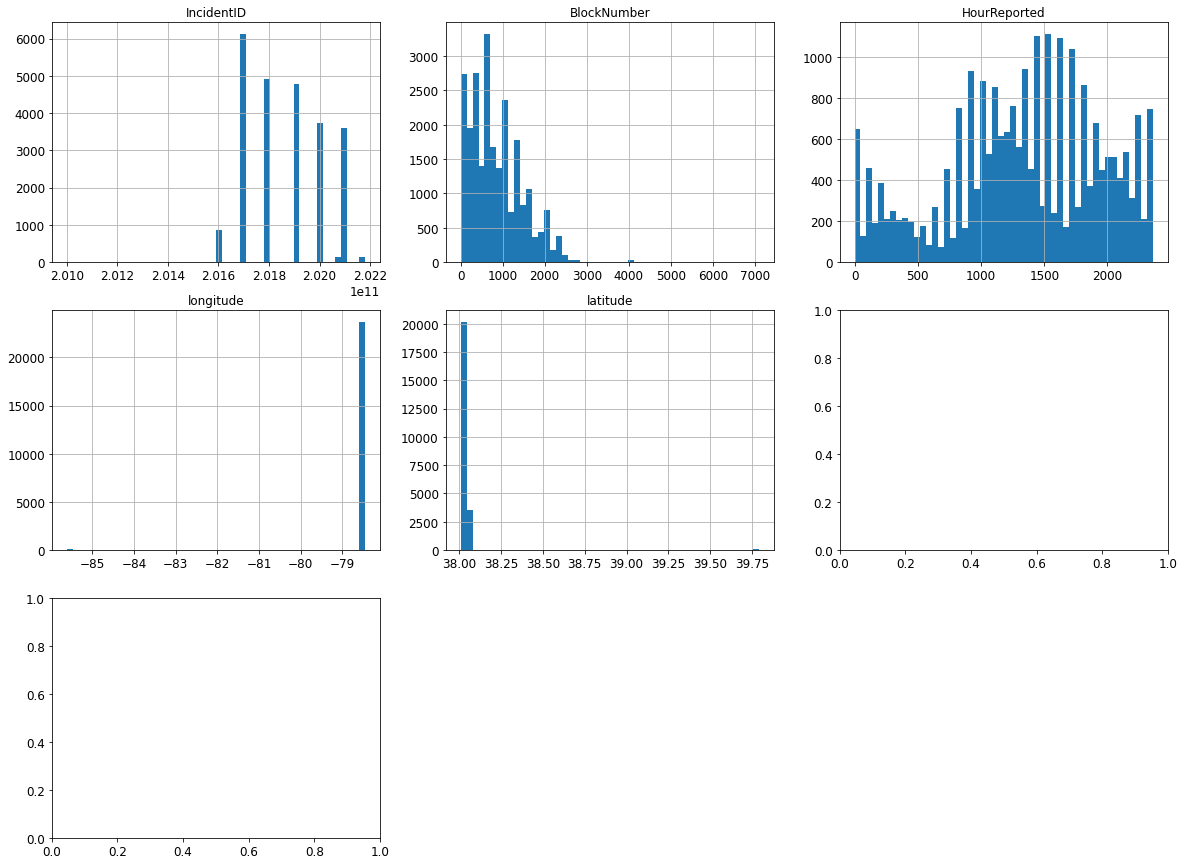

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
crime.hist(bins=50, figsize=(20,15))
plt.show()
#save_fig("attribute_histogram_plots")


In [ ]:
crime

,IncidentID,BlockNumber,StreetName,DateReported,HourReported,longitude,latitude,Grouped_Offense,daytime,DayOfWeek
0,2.021000e+11,1000.0,W MAIN ST,2021/11/07 05:55:37+00,155.0,-78.495070,38.032527,None,False,6.0
1,2.021000e+11,500.0,16TH ST NW,2021/11/07 04:44:30+00,44.0,-78.498628,38.040041,None,False,6.0
2,2.021000e+11,100.0,MADISON LN,2021/11/06 20:30:00+00,1630.0,-78.502246,38.036476,None,False,5.0
3,2.021000e+11,1200.0,CARLTON AVE,2021/11/06 16:10:42+00,1210.0,-78.471688,38.023378,Theft,True,5.0
4,2.021000e+11,700.0,6TH ST SE,2021/11/06 07:05:20+00,305.0,-78.480673,38.024994,Death,True,5.0
...,...,...,...,...,...,...,...,...,...,...
25370,2.016000e+11,700.0,PARK ST,2016/11/09 14:43:00+00,943.0,-78.475057,38.036761,None,True,2.0
25371,2.016000e+11,900.0,ST CHARLES AVE,2016/11/09 13:14:00+00,814.0,-78.466469,38.039576,Larceny,True,2.0
25372,2.016000e+11,100.0,AVON ST,2016/11/09 07:46:00+00,246.0,-78.475304,38.027847,None,False,2.0
25373,2.016000e+11,700.0,ANDERSON ST,2016/11/09 06:55:00+00,155.0,-78.488605,38.034261,Gun,False,2.0


In [ ]:
print(crime[crime.isnull().any(axis=1)].shape)
print(crime[0:10])
clean_crime = crime.dropna()
print(clean_crime.shape)

(6355, 10)
     IncidentID  BlockNumber   StreetName  ... Grouped_Offense  daytime  DayOfWeek
0  2.021000e+11       1000.0    W MAIN ST  ...            None    False        6.0
1  2.021000e+11        500.0   16TH ST NW  ...            None    False        6.0
2  2.021000e+11        100.0   MADISON LN  ...            None    False        5.0
3  2.021000e+11       1200.0  CARLTON AVE  ...           Theft     True        5.0
4  2.021000e+11        700.0    6TH ST SE  ...           Death     True        5.0
5  2.021000e+11       1300.0  CARLTON AVE  ...     Disturbance    False        4.0
6           NaN          NaN          NaN  ...             NaN    False        NaN
7  2.021000e+11        700.0    HARRIS ST  ...         Assault    False        4.0
8  2.021000e+11        900.0    NASSAU ST  ...         Traffic     True        4.0
9  2.021000e+11       1300.0  E MARKET ST  ...         Traffic     True        4.0

[10 rows x 10 columns]
(19020, 10)


In [ ]:
clean_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19020 entries, 3 to 25373
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IncidentID       19020 non-null  float64
 1   BlockNumber      19020 non-null  float64
 2   StreetName       19020 non-null  object 
 3   DateReported     19020 non-null  object 
 4   HourReported     19020 non-null  float64
 5   longitude        19020 non-null  float64
 6   latitude         19020 non-null  float64
 7   Grouped_Offense  19020 non-null  object 
 8   daytime          19020 non-null  bool   
 9   DayOfWeek        19020 non-null  float64
dtypes: bool(1), float64(6), object(3)
memory usage: 1.5+ MB


# Step 3. Discover and visualize the data to gain insights

In [ ]:
clean_crime = clean_crime[crime["longitude"] > -79]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
clean_crime.describe()

,IncidentID,BlockNumber,HourReported,longitude,latitude,DayOfWeek
count,1.896100e+04,18961.000000,18961.000000,18961.000000,18961.000000,18961.000000
mean,2.018672e+11,864.917462,1325.933495,-78.487803,38.033032,2.940773
std,1.513387e+08,610.864327,616.482408,0.013098,0.011628,1.986751
min,2.010000e+11,0.000000,0.000000,-78.522175,38.008876,0.000000
25%,2.017000e+11,400.000000,937.000000,-78.497511,38.024994,1.000000
50%,2.019000e+11,800.000000,1354.000000,-78.487960,38.030812,3.000000
75%,2.020000e+11,1300.000000,1813.000000,-78.479287,38.037955,5.000000
max,2.021800e+11,4000.000000,2359.000000,-78.451442,38.071759,6.000000


In [ ]:
!wget https://github.com/djzh01/uva-crime-map/raw/main/charlottesville.zip
!unzip charlottesville.zip

--2021-12-10 03:14:04--  https://github.com/djzh01/uva-crime-map/raw/main/charlottesville.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/djzh01/uva-crime-map/main/charlottesville.zip [following]
--2021-12-10 03:14:04--  https://raw.githubusercontent.com/djzh01/uva-crime-map/main/charlottesville.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4255 (4.2K) [application/zip]
Saving to: ‘charlottesville.zip’

charlottesville.zip 100%[===================>]   4.16K  --.-KB/s    in 0s      

2021-12-10 03:14:04 (26.1 MB/s) - ‘charlottesville.zip’ saved [4255/4255]

Archive:  charlottesville.zip

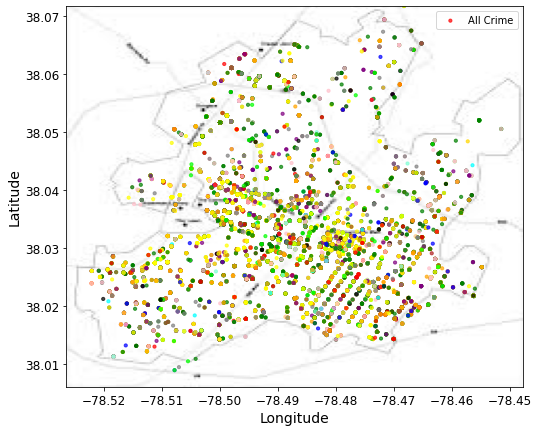

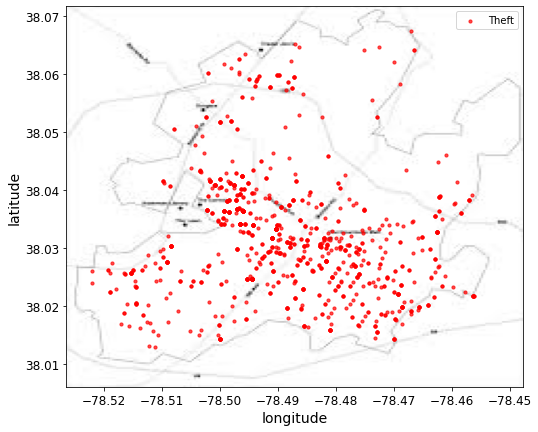

In [ ]:
import matplotlib.image as mpimg
# Read the image of California (make sure you have it in the directory)
c_img=mpimg.imread(PROJECT_ROOT_DIR + '/charlottesville.jpg')
colors = {'Theft':'red', 'Death':'black', 'Disturbance':'blue', 'Assault':'orange', 'Traffic':'yellow', 'Larceny':'green',
       'Vandalism':'purple', 'Potential Threat':'pink', 'Drug':'lime', 'Fraud':'gray', 'Missing Person':'sienna',
       'Sex Offense':'gold', 'Gun':'aquamarine', 'Trespass':'cyan', 'Monetary':'firebrick', 'Mental Health':'violet',
       'Mental health':'violet'}
ax = clean_crime.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                        c=clean_crime['Grouped_Offense'].map(colors), cmap=plt.get_cmap("jet"),
                       s = 10, colorbar=False, alpha=0.7, label="All Crime"
                      )
plt.imshow(c_img, extent=[-78.526517, -78.447724, 38.006005, 38.071712], alpha=1, cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# prices = housing["median_house_value"]
# tick_values = np.linspace(prices.min(), prices.max(), 11)
# cbar = plt.colorbar()
# cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
# cbar.set_label('Median House Value', fontsize=16)

#plt.legend(fontsize=16)
# save_fig("california_housing_prices_plot")
plt.show()

clean_crime_theft = clean_crime[clean_crime['Grouped_Offense'] == 'Theft']
ax = clean_crime_theft.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                        c='red', cmap=plt.get_cmap("jet"),
                       s = 10, colorbar=False, alpha=0.7, label='Theft'
                      )
plt.imshow(c_img, extent=[-78.526517, -78.447724, 38.006005, 38.071712], alpha=1, cmap=plt.get_cmap("jet"))
plt.show()

In [ ]:
# Use corr() to see the correlations (aka Standard Correlation Coefficient or Pearson's r) among the features of the dataset
corr_matrix = clean_crime.corr()
corr_matrix.shape
corr_matrix

,IncidentID,BlockNumber,HourReported,longitude,latitude,daytime,DayOfWeek
IncidentID,1.000000,0.040353,0.025062,-0.017546,0.021595,0.015133,-0.007743
BlockNumber,0.040353,1.000000,0.014632,-0.131213,0.349660,0.015320,-0.015628
HourReported,0.025062,0.014632,1.000000,0.026182,0.006483,-0.447633,-0.069926
longitude,-0.017546,-0.131213,0.026182,1.000000,-0.085175,-0.010730,-0.015512
latitude,0.021595,0.349660,0.006483,-0.085175,1.000000,0.003988,-0.002097
daytime,0.015133,0.015320,-0.447633,-0.010730,0.003988,1.000000,-0.055670
DayOfWeek,-0.007743,-0.015628,-0.069926,-0.015512,-0.002097,-0.055670,1.000000


# Step 4. Prepare the data for Machine Learning algorithms (aka Data Cleaning)

In [ ]:
clean_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18961 entries, 3 to 25373
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IncidentID       18961 non-null  float64
 1   BlockNumber      18961 non-null  float64
 2   StreetName       18961 non-null  object 
 3   DateReported     18961 non-null  object 
 4   HourReported     18961 non-null  float64
 5   longitude        18961 non-null  float64
 6   latitude         18961 non-null  float64
 7   Grouped_Offense  18961 non-null  object 
 8   daytime          18961 non-null  bool   
 9   DayOfWeek        18961 non-null  float64
dtypes: bool(1), float64(6), object(3)
memory usage: 1.5+ MB


In [ ]:
clean_crime = clean_crime.drop(['IncidentID', 'BlockNumber', 'StreetName', 'DateReported'], axis = 1)

In [ ]:
list(clean_crime.columns)

['HourReported',
 'longitude',
 'latitude',
 'Grouped_Offense',
 'daytime',
 'DayOfWeek']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

num_attribs = list(clean_crime.columns[clean_crime.dtypes == 'float64'])
cat_attribs = list(clean_crime.columns[(clean_crime.dtypes == 'object') | (clean_crime.dtypes == 'bool')])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(sparse=False), cat_attribs),
    ])

clean_crime_prepared = full_pipeline.fit_transform(clean_crime)

In [ ]:
clean_crime_prepared

array([[-0.18806141,  1.23032732, -0.83020455, ...,  0.        ,
         0.        ,  1.        ],
       [-1.65610633,  0.54434567, -0.69126445, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.4964855 ,  1.41193185, -0.94015257, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.44760526, -0.03887579, -1.30119902, ...,  0.        ,
         0.        ,  1.        ],
       [-0.83043245,  1.62882076,  0.56285163, ...,  0.        ,
         0.        ,  1.        ],
       [-1.89942869, -0.06126236,  0.10573827, ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
clean_crime_prepared.shape

(18961, 22)

# Step 5. Select and train a model 

In [ ]:
from sklearn.cluster import KMeans

k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(clean_crime_prepared)

In [ ]:
clean_crime_final = clean_crime.copy()
clean_crime_final['Cluster'] = y_pred.tolist()

In [ ]:
clean_crime_final.head()

,HourReported,longitude,latitude,Grouped_Offense,daytime,DayOfWeek,Cluster
3,1210.0,-78.471688,38.023378,Theft,True,5.0,1
4,305.0,-78.480673,38.024994,Death,True,5.0,1
5,1632.0,-78.469310,38.022100,Disturbance,False,4.0,0
7,1519.0,-78.484271,38.035884,Assault,False,4.0,0
8,1458.0,-78.468539,38.016912,Traffic,True,4.0,1


In [ ]:
kmeans.cluster_centers_

array([[ 9.36185053e-01,  1.23823291e-01, -3.65342799e-01,
        -1.94248406e-02,  1.74842583e-01,  1.20076146e-02,
         5.18377508e-02,  7.33635964e-02,  4.99341046e-02,
         1.84507248e-02,  1.99589984e-01,  1.02504027e-03,
         3.20691170e-02,  3.36798946e-03,  8.05388783e-02,
         1.75721189e-02,  5.53521745e-02,  1.47312930e-01,
         1.01039684e-02,  7.26314248e-02,  1.00000000e+00,
         3.06421555e-14],
       [-9.01934808e-01, -8.91489435e-02, -3.05970398e-01,
         9.26399840e-01,  1.65052817e-01,  1.51848592e-02,
         4.90757042e-02,  7.57042254e-02,  3.30105634e-02,
         2.50880282e-02,  1.93221831e-01,  2.42077465e-03,
         1.87059859e-02,  2.64084507e-03,  7.19630282e-02,
         1.87059859e-02,  6.64612676e-02,  1.55809859e-01,
         9.68309859e-03,  9.72711268e-02,  2.49779930e-01,
         7.50220070e-01],
       [ 8.99014628e-02, -3.92392818e-01,  1.88907958e+00,
        -4.57781585e-02,  1.36933798e-01,  1.56794425e-02,
    

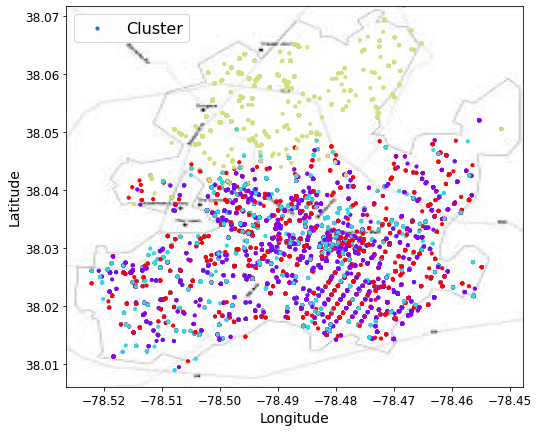

In [ ]:
ax = clean_crime_final.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                      s=10,label="Cluster",
                      c="Cluster", cmap=plt.get_cmap("rainbow"),
                      colorbar=False, alpha=1,)

plt.imshow(c_img, extent=[-78.526517, -78.447724, 38.006005, 38.071712], alpha=1, cmap=plt.get_cmap("jet"))

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

plt.legend(fontsize=16)
plt.show()

Inertia - distance between each instance and its centroid.

In [ ]:
kmeans.inertia_

65248.65811419508

# Step 6. Fine tune your model

Using inertia to find the optimal k size

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(clean_crime_prepared)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]


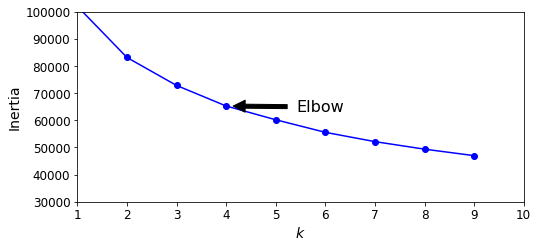

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl



plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 10, 30000, 100000])
#save_fig("inertia_vs_k_plot")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score(clean_crime_prepared, kmeans.labels_)

0.17955405935593174

In [ ]:
silhouette_scores = [silhouette_score(clean_crime_prepared, model.labels_)
                     for model in kmeans_per_k[1:]]

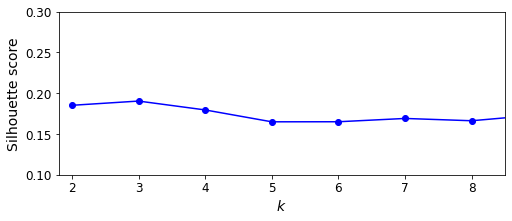

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.1, 0.3])
#save_fig("silhouette_score_vs_k_plot")
plt.show()

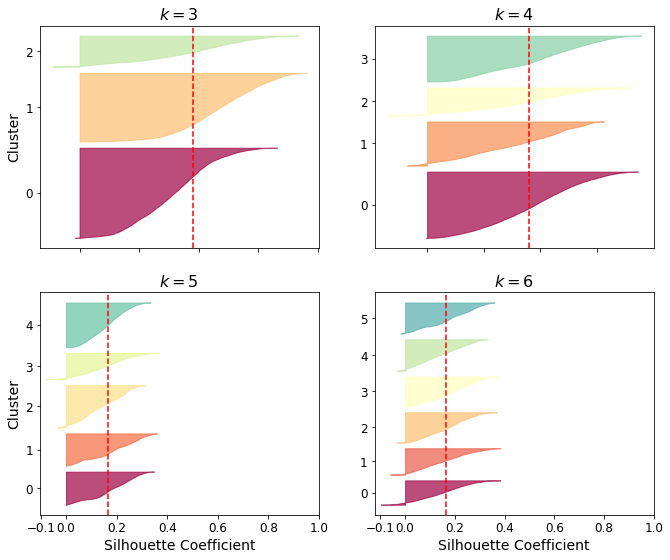

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(clean_crime_prepared, y_pred)

    padding = len(clean_crime_final) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

# save_fig("silhouette_analysis_plot")
plt.show()

# Crime Predictor

## Data Processing 

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(clean_crime, test_size=0.2, random_state=42)
X_train = train_set.drop("Grouped_Offense", axis=1)
y_train = train_set["Grouped_Offense"].copy()
X_test = test_set.drop("Grouped_Offense", axis=1)
y_test = test_set["Grouped_Offense"].copy()

In [ ]:
clean_crime

,HourReported,longitude,latitude,Grouped_Offense,daytime,DayOfWeek
3,1210.0,-78.471688,38.023378,Theft,True,5.0
4,305.0,-78.480673,38.024994,Death,True,5.0
5,1632.0,-78.469310,38.022100,Disturbance,False,4.0
7,1519.0,-78.484271,38.035884,Assault,False,4.0
8,1458.0,-78.468539,38.016912,Traffic,True,4.0
...,...,...,...,...,...,...
25366,1150.0,-78.462290,38.044864,Theft,True,2.0
25367,1121.0,-78.472869,38.052558,Assault,True,2.0
25369,1050.0,-78.488312,38.017902,Fraud,True,2.0
25371,814.0,-78.466469,38.039576,Larceny,True,2.0


In [ ]:
train_set

,HourReported,longitude,latitude,Grouped_Offense,daytime,DayOfWeek
9939,1026.0,-78.479287,38.030086,Potential Threat,True,5.0
18814,2355.0,-78.493871,38.034065,Traffic,False,4.0
17248,1329.0,-78.499344,38.020529,Fraud,True,2.0
18639,1500.0,-78.495397,38.024613,Fraud,False,0.0
10311,2254.0,-78.469310,38.022100,Traffic,False,5.0
...,...,...,...,...,...,...
15401,1404.0,-78.503050,38.049284,Traffic,True,2.0
16353,1412.0,-78.486820,38.038924,Fraud,True,2.0
7186,617.0,-78.514430,38.024246,Drug,True,5.0
1105,1938.0,-78.482076,38.031726,Larceny,False,1.0


## Decision Tree

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

decision_tree = DecisionTreeClassifier(random_state = 42, max_depth=2)
decision_tree = decision_tree.fit(X_train, y_train)

r = export_text(decision_tree, feature_names=['HourReported',	'longitude',	'latitude',	'daytime','DayOfWeek'])

r


'|--- HourReported <= 601.50\n|   |--- latitude <= 38.03\n|   |   |--- class: Assault\n|   |--- latitude >  38.03\n|   |   |--- class: Assault\n|--- HourReported >  601.50\n|   |--- HourReported <= 1803.50\n|   |   |--- class: Larceny\n|   |--- HourReported >  1803.50\n|   |   |--- class: Assault\n'

In [ ]:
decision_tree.score(X_test, y_test)

0.24387028737147376

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'max_depth': randint(low=1, high=100),
        'min_samples_leaf': randint(low=5, high=100),
    }


r_search = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_distribs, scoring = "accuracy", cv=5, n_iter=10, verbose=1,random_state=42)

In [ ]:
r_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=42),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51eaa7da90>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51eaacf4d0>},
                   random_state=42, scoring='accuracy', verbose=1)

In [ ]:
cvres = r_search.cv_results_
for accuracy, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(accuracy, params)

0.25599934449901884 {'max_depth': 52, 'min_samples_leaf': 97}
0.25553782051574625 {'max_depth': 15, 'min_samples_leaf': 76}
0.253692507010883 {'max_depth': 61, 'min_samples_leaf': 25}
0.256263044545595 {'max_depth': 83, 'min_samples_leaf': 91}
0.25646080327993914 {'max_depth': 75, 'min_samples_leaf': 79}
0.2581096186292683 {'max_depth': 88, 'min_samples_leaf': 28}
0.24657197546392018 {'max_depth': 3, 'min_samples_leaf': 26}
0.21762982494689811 {'max_depth': 53, 'min_samples_leaf': 6}
0.2572523815702509 {'max_depth': 88, 'min_samples_leaf': 34}
0.21762982494689811 {'max_depth': 38, 'min_samples_leaf': 6}


In [ ]:
decision_tree_tuned = r_search.best_estimator_

In [ ]:
decision_tree_tuned.score(X_test,y_test)

0.26285262325336145

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
rnd_clf.score(X_test, y_test)

0.22831531769048247

In [ ]:
 param_distribs = {
        'n_estimators': randint(low=10, high=50),
        'max_depth': randint(low=10, high=100),
        'max_features': randint(low=5, high=15),
    }


r_search = RandomizedSearchCV(estimator=rnd_clf, param_distributions=param_distribs, scoring = "accuracy", cv=5, n_iter=10, verbose=1,random_state=42)

In [ ]:
r_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 459, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/para

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51eab07b50>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51eab07d10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51eab078d0>},
                   random_state=42, scoring='accuracy', verbose=1)

In [ ]:
cvres = r_search.cv_results_
for accuracy, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(accuracy, params)

nan {'max_depth': 61, 'max_features': 12, 'n_estimators': 30}
nan {'max_depth': 92, 'max_features': 11, 'n_estimators': 20}
nan {'max_depth': 84, 'max_features': 12, 'n_estimators': 45}
nan {'max_depth': 33, 'max_features': 7, 'n_estimators': 31}
nan {'max_depth': 62, 'max_features': 6, 'n_estimators': 33}
nan {'max_depth': 39, 'max_features': 10, 'n_estimators': 11}
nan {'max_depth': 73, 'max_features': 9, 'n_estimators': 42}
nan {'max_depth': 85, 'max_features': 14, 'n_estimators': 31}
0.2302220292232596 {'max_depth': 98, 'max_features': 5, 'n_estimators': 36}
nan {'max_depth': 68, 'max_features': 14, 'n_estimators': 37}


In [ ]:
rf_cdf_tuned = r_search.best_estimator_

In [ ]:
rf_cdf_tuned.score(X_test,y_test)

0.23068810967571843

## Gradient Booster Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=1, random_state=42).fit(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

0.2523068810967572

In [ ]:
clf = GradientBoostingClassifier(random_state=42)
param_distribs = {
        'n_estimators': randint(low=100, high=1000),
        'max_depth': randint(low=2, high=10),
    }


r_search = RandomizedSearchCV(estimator=clf, param_distributions=param_distribs, scoring = "accuracy", cv=2, n_iter=1, verbose=2,random_state=42)

In [ ]:
r_search.fit(X_train,y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END ......................max_depth=8, n_estimators=535; total time= 3.5min
[CV] END ......................max_depth=8, n_estimators=535; total time= 3.4min


RandomizedSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51eaa68310>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51eaa68c90>},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:
r_search.best_estimator_

GradientBoostingClassifier(max_depth=8, n_estimators=535, random_state=42)

In [ ]:
clf_tuned = r_search.best_estimator_
clf_tuned.score(X_test,y_test)

0.2501977326654363

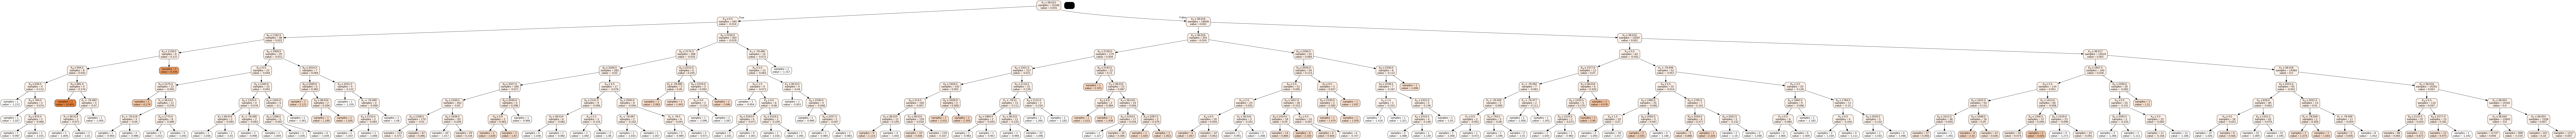

In [ ]:
from sklearn.tree import export_graphviz
import numpy as np

# Get the tree number 42
sub_tree_42 = clf_tuned.estimators_[42, 0]

# Visualization. Install graphviz in your system
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(
    sub_tree_42,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False, # enable them if you want
)
graph = graph_from_dot_data(dot_data)
Image(graph.create_png())

## Ensemble Learning

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('gdb', clf_tuned), ('rf', rf_cdf_tuned), ('dt', decision_tree_tuned)],
    voting='soft')

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('gdb',
                              GradientBoostingClassifier(max_depth=8,
                                                         n_estimators=535,
                                                         random_state=42)),
                             ('rf',
                              RandomForestClassifier(max_depth=10,
                                                     max_features=5,
                                                     n_estimators=25,
                                                     random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=88,
                                                     min_samples_leaf=28,
                                                     random_state=42))],
                 voting='soft')

In [ ]:
voting_clf.score(X_test,y_test)

0.2683891378855787